<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/ARIMA_blackcoal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.모듈 불러오기

In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima



import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")



In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 2.colmns 정리

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/df_final.csv", encoding = 'utf-8-sig')

In [ ]:
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,호주지수,캐나다지수,베트남GDP,인도GDP,한국GDP,일본GDP,중국GDP,미국GDP,EUGDP,세계GDP
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,6821.700195,17168.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,6816.299805,17118.400391,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,6739.700195,17003.099609,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,6707.000000,16997.000000,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,6846.000000,17040.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,4774.899902,13437.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,4755.700195,13258.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,4801.500000,13464.099609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,4705.000000,13272.299805,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13


In [ ]:
# df= df.rename(columns={'Unnamed: 0':'date'})

In [ ]:
# 전체 컬럼명 확인

#pd.set_option('display.max_seq_items', 10)
col_names = df.columns.tolist()
print(df.columns)

Index(['date', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut',
       'WTI', 'LNG_fut', 'KPPI', 'ACPI', 'KCPI', 'APPI', 'APPI2', 'bdi',
       'South Korea_Electricity from coal (TWh)',
       'South Korea_Electricity from gas (TWh)',
       'South KoreaElectricity from hydro (TWh)',
       'South Korea_Electricity from other renewables including bioenergy (TWh)',
       'South Korea_Electricity from solar (TWh)',
       'South Korea_Electricity from oil (TWh)',
       'South Korea_Electricity from wind (TWh)',
       'South Korea_Electricity from nuclear (TWh)',
       'Japan_Electricity from coal (TWh)', 'Japan_Electricity from gas (TWh)',
       'Japan_Electricity from hydro (TWh)',
       'Japan_Electricity from other renewables including bioenergy (TWh)',
       'Japan_Electricity from solar (TWh)',
       'Japan_Electricity from oil (TWh)', 'Japan_Electricity from wind (TWh)',
       'Japan_Electricity from nuclear (TWh)',
       'China_Electricity from coal (TWh)', '

In [ ]:
col_names = pd.DataFrame(col_names)
col_names

,0
0,date
1,Coal_price
2,iron
3,Brent_fut
4,copper_fut
...,...
71,일본GDP
72,중국GDP
73,미국GDP
74,EUGDP


In [ ]:
col_names.to_csv('/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_colname.csv', index = True, encoding = 'utf-8-sig')

# 3.1차 차분 
*   정상성을 만족하는 데이터 만들기
*   그래프와 p값을 통해 확인





In [ ]:
df1 = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/df_final.csv", encoding = 'utf-8-sig')
df1

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,호주지수,캐나다지수,베트남GDP,인도GDP,한국GDP,일본GDP,중국GDP,미국GDP,EUGDP,세계GDP
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,6821.700195,17168.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,6816.299805,17118.400391,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,6739.700195,17003.099609,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,6707.000000,16997.000000,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,6846.000000,17040.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,4774.899902,13437.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,4755.700195,13258.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,4801.500000,13464.099609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,4705.000000,13272.299805,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13


In [ ]:
df1 = df1.sort_values('date')
df1

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,호주지수,캐나다지수,베트남GDP,인도GDP,한국GDP,일본GDP,중국GDP,미국GDP,EUGDP,세계GDP
469,2011-01-02,136.35,173.50,93.33,9436.0,88.03,88.48,56.16,6.8,220.223,...,4745.200195,13443.200195,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,4705.000000,13272.299805,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,4801.500000,13464.099609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,4755.700195,13258.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,4774.899902,13437.599609,1.355394e+11,1.823050e+12,1.253223e+12,6.233147e+12,7.551500e+12,1.554258e+13,1.575949e+13,7.367146e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,6846.000000,17040.199219,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,6707.000000,16997.000000,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,6739.700195,17003.099609,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,6816.299805,17118.400391,2.619212e+11,2.870504e+12,1.651423e+12,5.148782e+12,1.427994e+13,2.143322e+13,1.568936e+13,8.756805e+13


In [ ]:
df1['date'] = pd.to_datetime(df1['date'])

test = df1[(df1['date'] >= '2019-01-01')]
lag_size = (test['date'].max() - test['date'].min())
print('Min date from test set : %s' % test['date'].min().date())
print('Max date from test set : %s' % test['date'].max().date())
print('Forecast lag size', lag_size)



ts = df1.iloc[:,[0,1]]
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.set_index('date')
ts

Min date from test set : 2019-01-06
Max date from test set : 2019-12-29
Forecast lag size 357 days 00:00:00


,Coal_price
date,
2011-01-02,136.35
2011-01-09,136.00
2011-01-16,131.90
2011-01-23,130.35
2011-01-30,127.00
...,...
2019-12-01,66.40
2019-12-08,66.30
2019-12-15,66.35


## 3.1 stationary 시각화 확인

<Figure size 432x288 with 0 Axes>

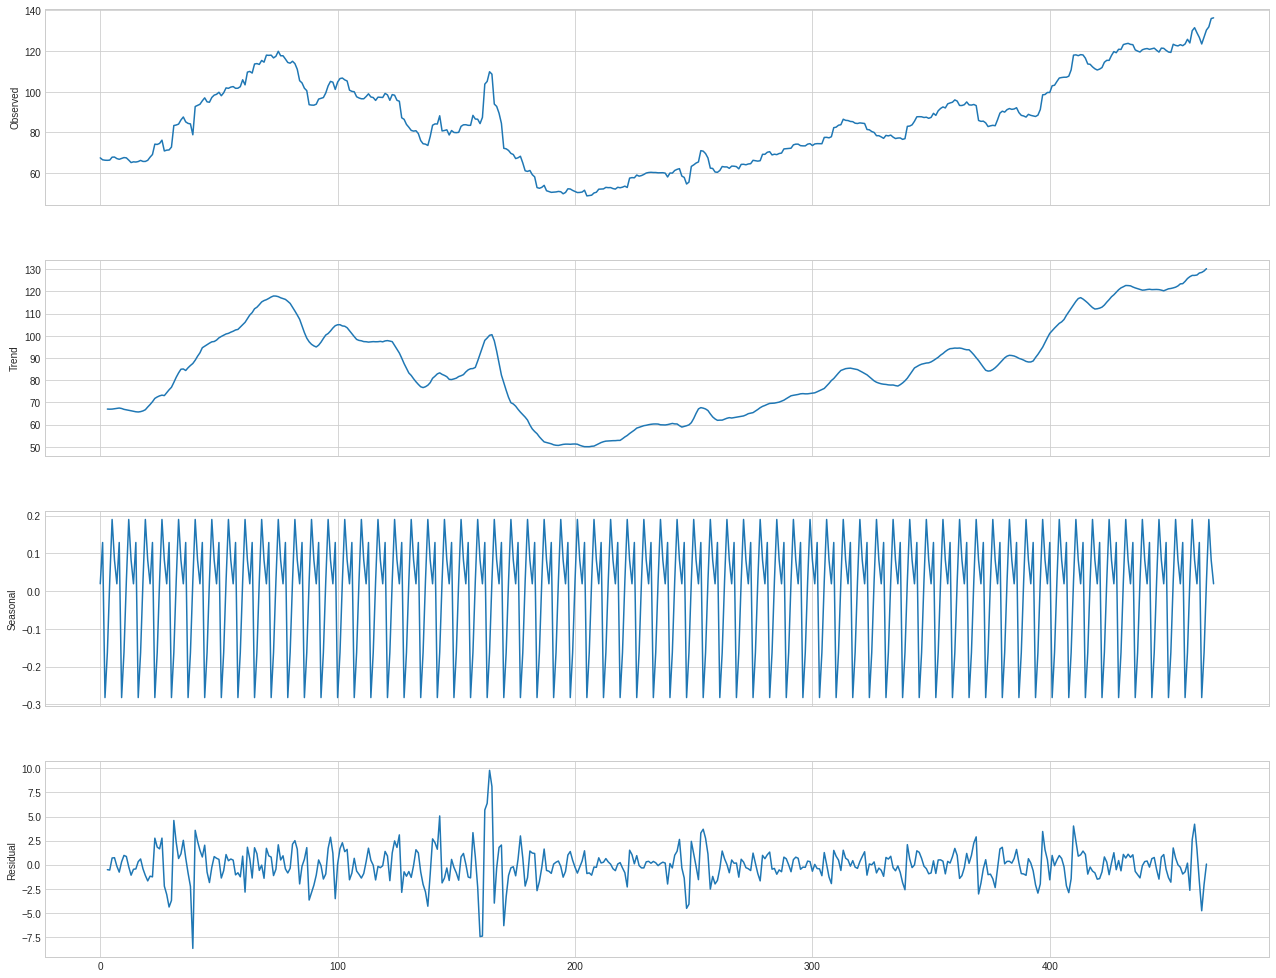

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1.iloc[:,1], model='additive', freq =7)
# freq에 들어가는 주기는 계절성을 주기를 기반으로 설정해준다. 분기별은 4, 월별데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 설정해서 보면서 맞춰가야함/1년이면 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [ ]:
# 패턴이 보인다면 정상성이 의심된다. 이를 판단하기 위해서 ACF그래프 그려본다

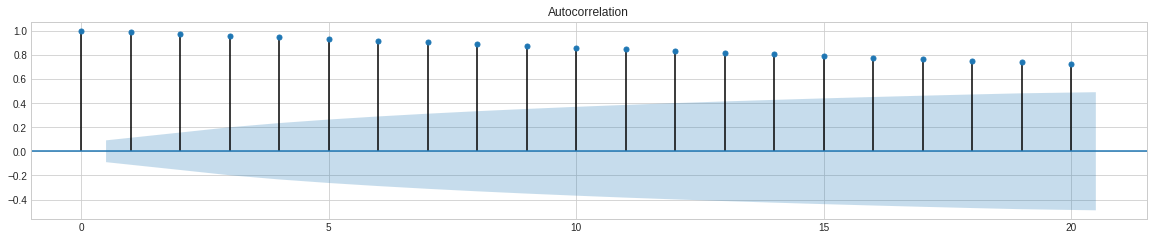

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.iloc[:,1], lags=20, ax=ax1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1.iloc[:,1])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -2.178266
p-value: 0.214228
Critical Values:
Wt1%: -3.445
Wt5%: -2.868
Wt10%: -2.570


In [ ]:
result

(-2.1782655468669057,
 0.21422815593477884,
 9,
 460,
 {'1%': -3.44464601455782,
  '10%': -2.570127622873346,
  '5%': -2.867843681679954},
 2042.6650259458033)

In [ ]:
# p-valu가 0.05를 넘으므로, 귀무가설을 기각하지 못한다. (정상성만족 x)
# 이를 해결하기 위해 1차 차분



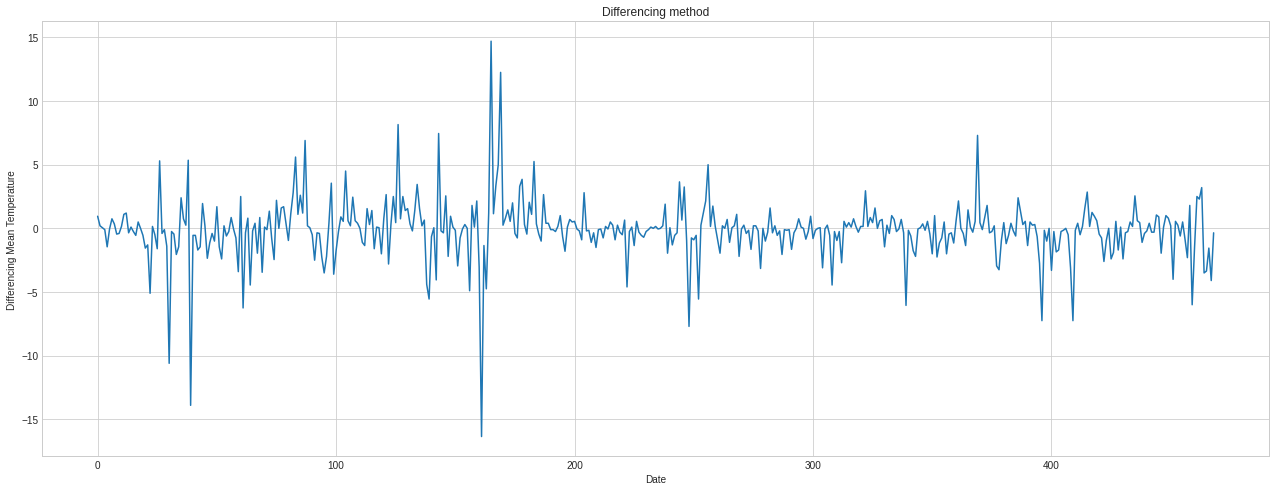

In [ ]:
ts_diff = df1['Coal_price'] - df1['Coal_price'].shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [ ]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -6.715399
p-value: 0.000000
Critical Values:
Wt1%: -3.445
Wt5%: -2.868
Wt10%: -2.570


In [ ]:
ts_diff

469     NaN
468   -0.35
467   -4.10
466   -1.55
465   -3.35
       ... 
4     -1.45
3     -0.10
2      0.05
1      0.20
0      0.95
Name: Coal_price, Length: 470, dtype: float64

## 3.2 p와 q결정
-정상성을 만족하는 차분된 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 
p와 q를 결정한다.

- 어떤 변수로 p와 q를 결정하는지 모르겠다.
- 보통 p나 q 값중 하나를 크게하여 사용 (실무진에서 경험적 사용)

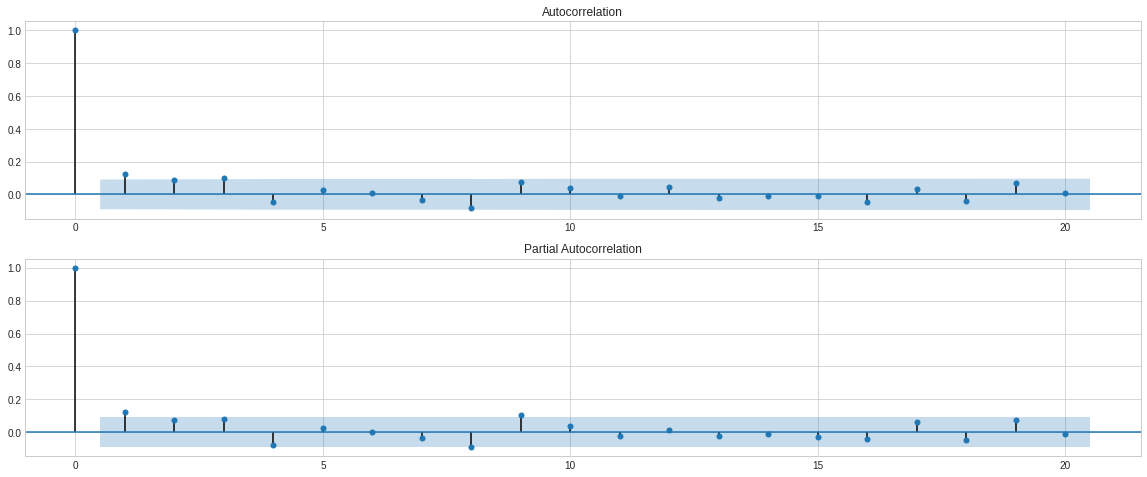

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:],lags = 20, ax = ax1 )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff[1:], lags = 20, ax = ax2) 

In [ ]:
start_index = ts.index.max()

start_index

Timestamp('2019-12-29 00:00:00')

In [ ]:
from datetime import datetime, timedelta
end_index = test['date'].max() - timedelta(days=1)

# 4.ARIMA model

##4.0 ARIMA In-sample

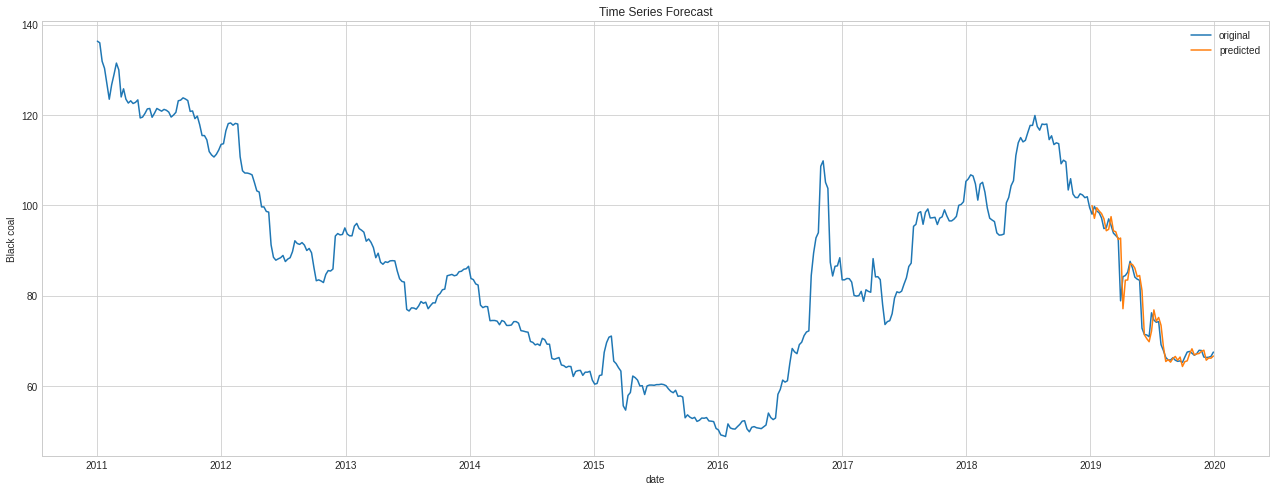

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from datetime import datetime, timedelta

# fit model
model = ARIMA(ts, order=(20,1,0))
model_fit = model.fit(disp = 0)

# predict
start_index = test['date'].min()
end_index = test['date'].max()
forecast = model_fit.predict(start = start_index, end = end_index, typ='levels')



# visualization
plt.figure(figsize=(22,8))
plt.plot(df1.date,df1.Coal_price,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("date")
plt.ylabel("Black coal")
plt.legend()
plt.show()

## 4.1 Estimate Parameters 


<Figure size 432x288 with 0 Axes>

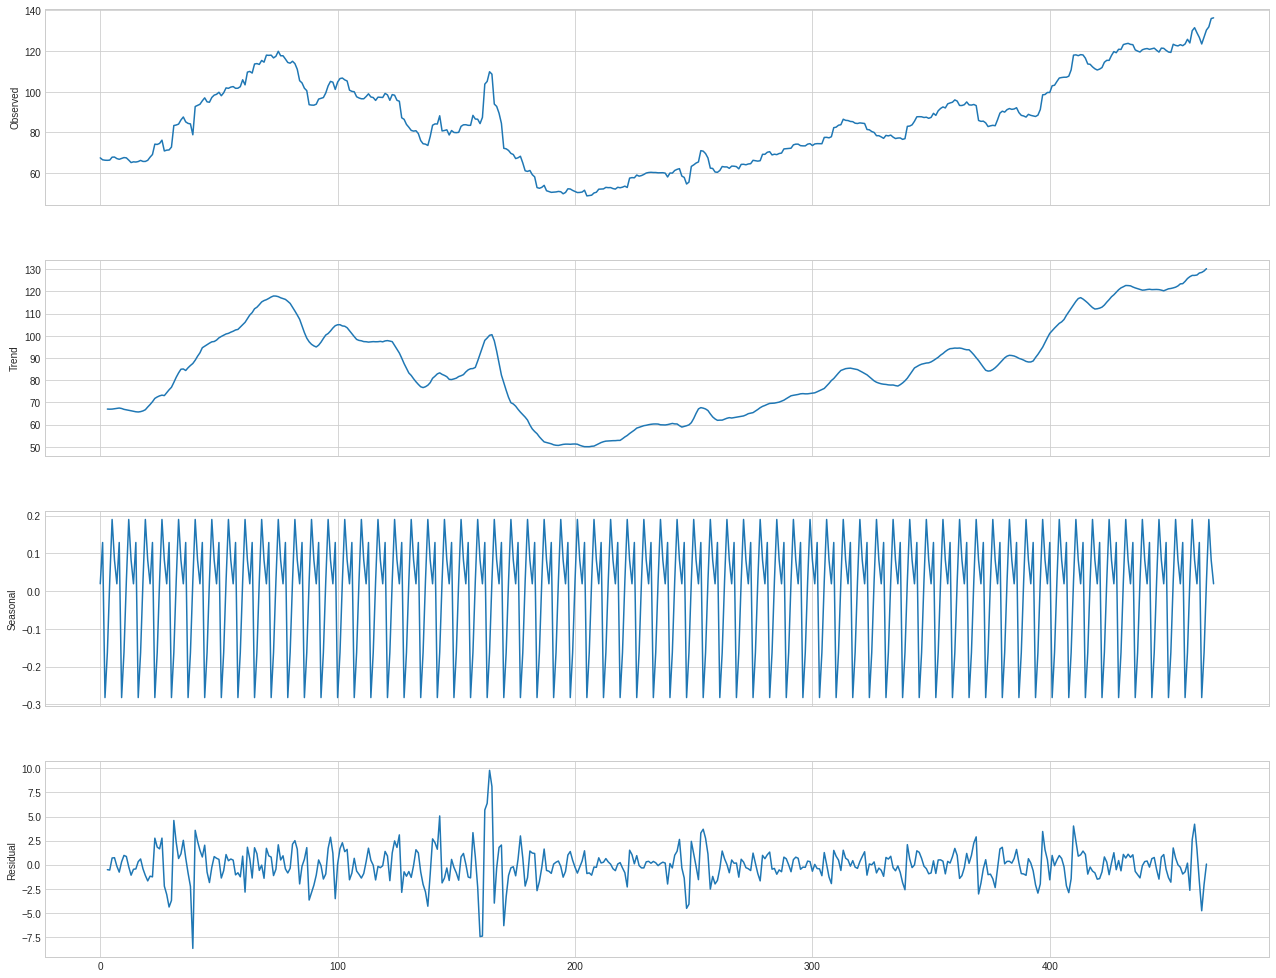

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1.iloc[:,1], model='additive', freq =7)
# freq에 들어가는 주기는 계절성을 주기를 기반으로 설정해준다. 분기별은 4, 월별데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 설정해서 보면서 맞춰가야함/1년이면 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

<Figure size 432x288 with 0 Axes>

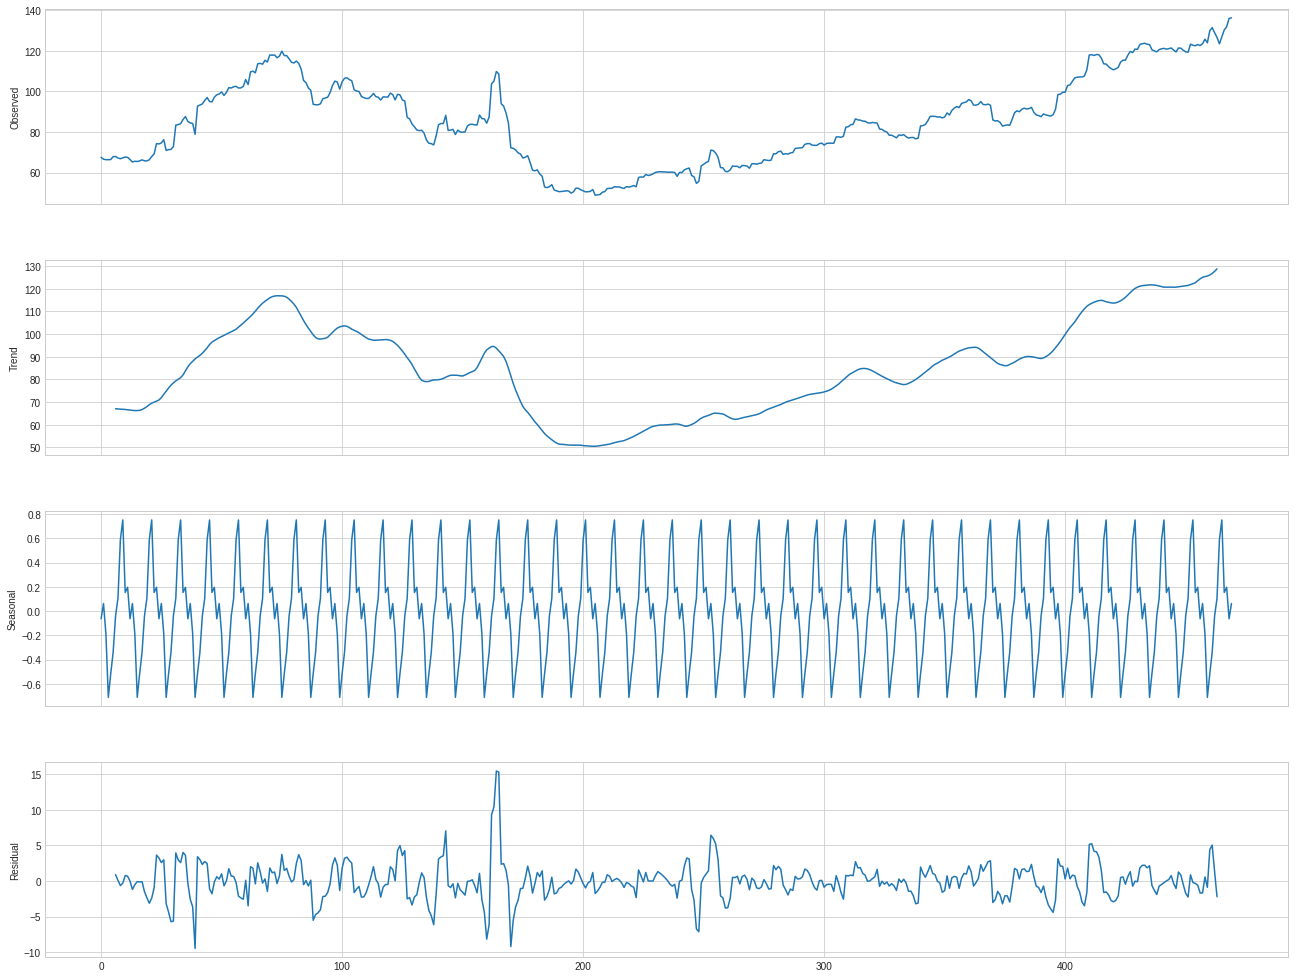

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1.iloc[:,1], model='additive', freq =12)
# freq에 들어가는 주기는 계절성을 주기를 기반으로 설정해준다. 분기별은 4, 월별데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 설정해서 보면서 맞춰가야함/1년이면 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [ ]:
train_data, test_data = train_test_split(ts, test_size = 0.2, shuffle = False)

In [ ]:
test_data

,Coal_price
date,
2018-03-18,96.75
2018-03-25,96.40
2018-04-01,93.90
2018-04-08,93.40
2018-04-15,93.45
...,...
2019-12-01,66.40
2019-12-08,66.30
2019-12-15,66.35


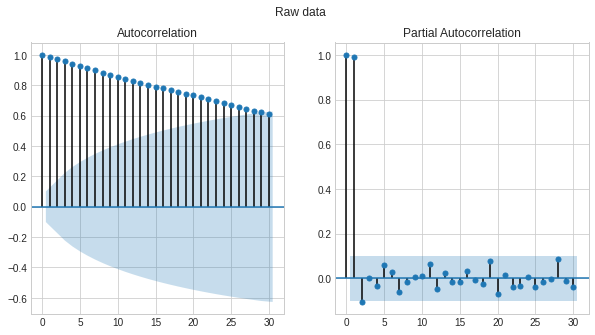

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags = 30, ax =ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags = 30, ax =ax[1]); #Modify not to generate graph twice

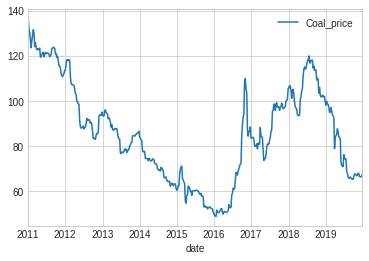

In [ ]:
fig = ts.plot()

## 4.2 차분

In [ ]:
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['Coal_price'].diff()
diff_train_data = diff_train_data.dropna()
print('######### Raw Data ##########')
print(train_data)
print('### Differenced Data ###')
print(diff_train_data)


######### Raw Data ##########
            Coal_price
date                  
2011-01-02      136.35
2011-01-09      136.00
2011-01-16      131.90
2011-01-23      130.35
2011-01-30      127.00
...                ...
2018-02-11      104.70
2018-02-18      105.10
2018-02-25      102.90
2018-03-04       99.40
2018-03-11       97.15

[376 rows x 1 columns]
### Differenced Data ###
date
2011-01-09   -0.35
2011-01-16   -4.10
2011-01-23   -1.55
2011-01-30   -3.35
2011-02-06   -3.50
              ... 
2018-02-11    3.55
2018-02-18    0.40
2018-02-25   -2.20
2018-03-04   -3.50
2018-03-11   -2.25
Name: Coal_price, Length: 375, dtype: float64


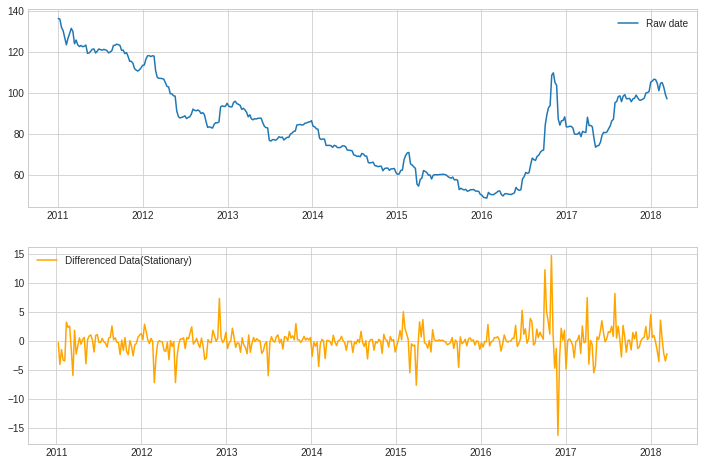

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['Coal_price'])
plt.legend(['Raw date'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data(Stationary)'])
plt.show()

In [ ]:
model = ARIMA(train_data.values, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  375
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -835.433
Method:                       css-mle   S.D. of innovations              2.245
Date:                Thu, 02 Jun 2022   AIC                           1676.866
Time:                        15:21:07   BIC                           1688.647
Sample:                             1   HQIC                          1681.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1060      0.142     -0.746      0.456      -0.384       0.172
ar.L1.D.y      0.1842      0.051      3.630      0.000       0.085       0.284
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.4289           +0.0000j            5.4289            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#parameter search
import itertools
print('examples of parameter')
p = range(0,3)
d = range(1,2)
q = range(0,2)
pdq = list(itertools.product(p, d, q))

aic = []
for i in pdq:
  model = ARIMA(train_data.values, order=(i))
  model_fit = model.fit()
  print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
  aic.append(round(model_fit.aic,2))

examples of parameter
ARIMA: (0, 1, 0) >> AIC : 1687.81
ARIMA: (0, 1, 1) >> AIC : 1678.22
ARIMA: (1, 1, 0) >> AIC : 1676.87
ARIMA: (1, 1, 1) >> AIC : 1677.4
ARIMA: (2, 1, 0) >> AIC : 1677.75
ARIMA: (2, 1, 1) >> AIC : 1679.4


In [ ]:
optimal = [(pdq[i],j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((1, 1, 0), 1676.87)]

In [ ]:
model_opt = ARIMA(train_data.values, order = optimal[0][0])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  375
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -835.433
Method:                       css-mle   S.D. of innovations              2.245
Date:                Thu, 02 Jun 2022   AIC                           1676.866
Time:                        15:21:08   BIC                           1688.647
Sample:                             1   HQIC                          1681.543
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1060      0.142     -0.746      0.456      -0.384       0.172
ar.L1.D.y      0.1842      0.051      3.630      0.000       0.085       0.284
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.4289           +0.0000j            5.4289            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
from sklearn.metrics import r2_score
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

In [ ]:
predicted_value
r2

0.24961466631367968

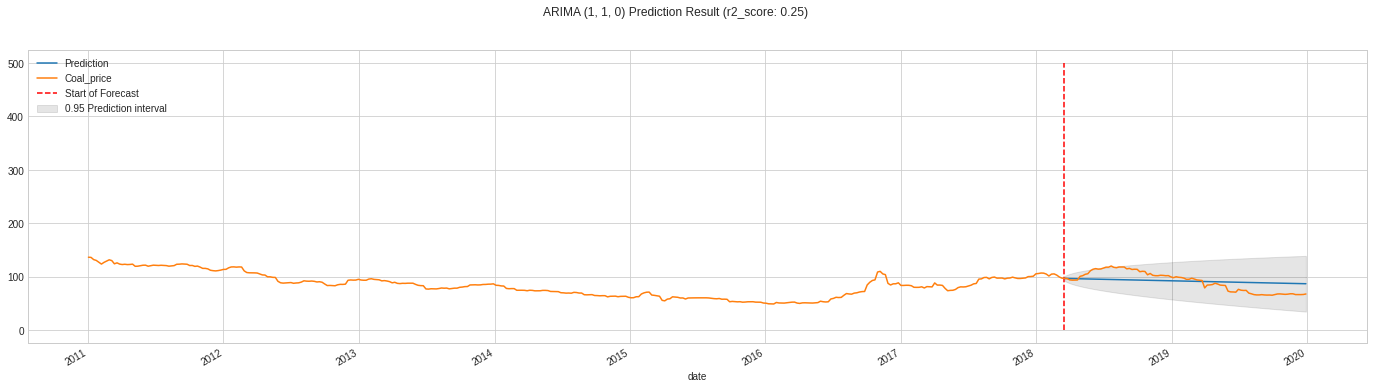

In [ ]:
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(predict_index, predicted_value, label= 'Prediction')
ts.plot(ax=ax);
ax.vlines('2018-03-18', 0, 500, linestyle = '--', color = 'r', label = 'Start of Forecast');

ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Result (r2_score: {round(r2,2)})')
plt.show()

## 4.3 Diagnosis Check - SARIMA

In [ ]:
#Parameter search

print('Examples of parameter')
p = range(0,3)
d = range(1,2)
q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
#12는 계절성이 있다고 생각하여 12를 줬는데 이부분도 탐색의 대상

aic = []
params = []
for i in pdq:
  for j in seasonal_pdq:
    try: 
        model = SARIMAX(train_data.values, order=(i), seasonal_order=(j))
        model_fit = model.fit()
        print(f'SARIMA: {i}{j} >> AIC : {round(model_fit.aic,2)}')
        aic.append(round(model_fit.aic,2))
        params.append((i,j))
    except:
      continue
      # 중간중간 예외가 뜨기 때문에 예외 처리를 따로 해준것.


Examples of parameter
SARIMA: (0, 1, 0)(0, 1, 0, 6) >> AIC : 1918.85
SARIMA: (0, 1, 0)(0, 1, 1, 6) >> AIC : 1689.16
SARIMA: (0, 1, 0)(1, 1, 0, 6) >> AIC : 1806.47
SARIMA: (0, 1, 0)(1, 1, 1, 6) >> AIC : 1691.06
SARIMA: (0, 1, 0)(2, 1, 0, 6) >> AIC : 1778.17
SARIMA: (0, 1, 0)(2, 1, 1, 6) >> AIC : 1692.9
SARIMA: (0, 1, 1)(0, 1, 0, 6) >> AIC : 1909.62
SARIMA: (0, 1, 1)(0, 1, 1, 6) >> AIC : 1679.72
SARIMA: (0, 1, 1)(1, 1, 0, 6) >> AIC : 1798.42
SARIMA: (0, 1, 1)(1, 1, 1, 6) >> AIC : 1681.67
SARIMA: (0, 1, 1)(2, 1, 0, 6) >> AIC : 1772.44
SARIMA: (0, 1, 1)(2, 1, 1, 6) >> AIC : 1683.53
SARIMA: (1, 1, 0)(0, 1, 0, 6) >> AIC : 1906.76
SARIMA: (1, 1, 0)(0, 1, 1, 6) >> AIC : 1678.35
SARIMA: (1, 1, 0)(1, 1, 0, 6) >> AIC : 1797.02
SARIMA: (1, 1, 0)(1, 1, 1, 6) >> AIC : 1680.34
SARIMA: (1, 1, 0)(2, 1, 0, 6) >> AIC : 1771.27
SARIMA: (1, 1, 0)(2, 1, 1, 6) >> AIC : 1682.22
SARIMA: (1, 1, 1)(0, 1, 0, 6) >> AIC : 1905.92
SARIMA: (1, 1, 1)(0, 1, 1, 6) >> AIC : 1678.81
SARIMA: (1, 1, 1)(1, 1, 0, 6) >> AIC : 

In [ ]:
#Search optimal parameters

optimal = [(params[i],j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[(((1, 1, 0), (0, 1, 1, 6)), 1678.35)]

In [ ]:
model_opt = SARIMAX(train_data.values, order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  376
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 6)   Log Likelihood                -836.177
Date:                           Thu, 02 Jun 2022   AIC                           1678.355
Time:                                   07:28:33   BIC                           1690.087
Sample:                                        0   HQIC                          1683.016
                                           - 376                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1851      0.064      2.879      0.004       0.059       0.311
ma.S.L6       -0.9993      0.933     -1.071      0.284      -2.829       0.830
sigma2         5.0951      4.656      1.094      0.274      -4.030      14.220
===================================================================================
Ljung-Box (Q):                       46.92   Jarque-Bera (JB):              2913.76
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4.4 use Model to Forecast - SARIMA

In [ ]:
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()[:,0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

In [ ]:
prediction

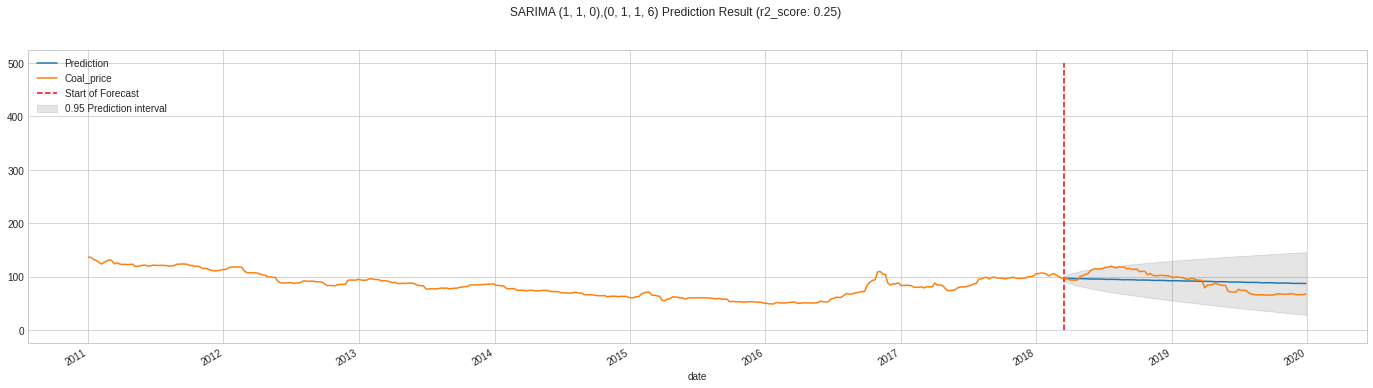

In [ ]:
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(predict_index, predicted_value, label= 'Prediction')
ts.plot(ax=ax);
ax.vlines('2018-03-18', 0, 500, linestyle = '--', color = 'r', label = 'Start of Forecast');

ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {optimal[0][0][0]},{optimal[0][0][1]} Prediction Result (r2_score: {round(r2,2)})')
plt.show()

## 4.5 auto_arima

In [ ]:
# 모델들을 적용하면서 feature 선정
# 회귀에서 light GBM? -> 회귀에서 사용해보는 것을 찾아보자.
# XGBOOST

#상관관계 

In [ ]:
#Parameter search

auto_arima_model = auto_arima(train_data, start_p = 1, start_q = 1,
                              max_p=3 , max_q=3, m=12, seasonal=True,
                              d=1 , D=1,
                              max_P=3, max_Q=3,
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings=True,
                              stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1871.615, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=inf, Time=10.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1782.529, Time=0.54 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=4.10 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=10.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1751.644, Time=0.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=5.11 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=13.29 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=1731.282, Time=1.12 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=8.87 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=inf, Time=18.86 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=186

In [ ]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  376
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood                -855.522
Date:                            Thu, 02 Jun 2022   AIC                           1721.045
Time:                                    15:29:21   BIC                           1740.517
Sample:                                         0   HQIC                          1728.785
                                            - 376                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1825      0.063      2.901      0.004       0.059       0.306
ar.S.L12      -0.7174      0.044    -16.468      0.000      -0.803      -0.632
ar.S.L24      -0.4775      0.053     -8.931      0.000      -0.582      -0.373
ar.S.L36      -0.2562      0.041     -6.283      0.000      -0.336      -0.176
sigma2         6.3802      0.219     29.112      0.000       5.951       6.810
===================================================================================
Ljung-Box (Q):                       51.63   Jarque-Bera (JB):               906.68
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4.6 use Model to Forecast - auto_arima

In [ ]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

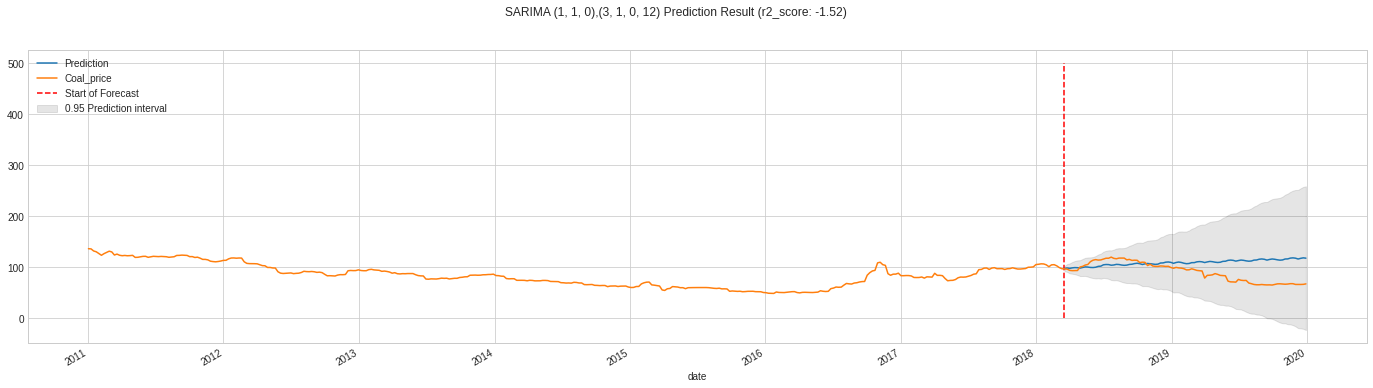

In [ ]:
fig, ax = plt.subplots(figsize=(24,6))
ax.plot(predict_index, predicted_value, label= 'Prediction')
ts.plot(ax=ax);
ax.vlines('2018-03-18', 0, 500, linestyle = '--', color = 'r', label = 'Start of Forecast');

ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction interval')
ax.legend(loc='upper left')
plt.suptitle(f'SARIMA {auto_arima_model.order},{auto_arima_model.seasonal_order} Prediction Result (r2_score: {round(r2,2)})')
plt.show()